In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### 1. Data Collection and Cleaning: 
• Prepare and clean data from both the Diabetes 130-US hospitals. Handle missing values, standardize formats, and 
ensure consistency across variables. 

In [3]:
df1 = pd.read_csv(r"C:\Users\husai\OneDrive\Desktop\Project&Assignments\inClassCapStone\diabetes+130-us+hospitals+for+years+1999-2008\diabetic_data.csv")
df1.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [5]:
print(df1['weight'].value_counts())
print(df1['race'].value_counts())
print(df1['payer_code'].value_counts())

weight
?            98569
[75-100)      1336
[50-75)        897
[100-125)      625
[125-150)      145
[25-50)         97
[0-25)          48
[150-175)       35
[175-200)       11
>200             3
Name: count, dtype: int64
race
Caucasian          76099
AfricanAmerican    19210
?                   2273
Hispanic            2037
Other               1506
Asian                641
Name: count, dtype: int64
payer_code
?     40256
MC    32439
HM     6274
SP     5007
BC     4655
MD     3532
CP     2533
UN     2448
CM     1937
OG     1033
PO      592
DM      549
CH      146
WC      135
OT       95
MP       79
SI       55
FR        1
Name: count, dtype: int64


#### We found lot of '?' converting it into Meaningful 

In [8]:
df1.replace("?", np.nan, inplace=True)

In [10]:
df1.head(50).T

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
encounter_id,2278392,149190,64410,500364,16680,35754,55842,63768,12522,15738,...,383430,419304,421194,449142,450210,464994,486156,498030,537834,544194
patient_nbr,8222157,55629189,86047875,82442376,42519267,82637451,84259809,114882984,48330783,63555939,...,80588529,99715041,96435585,66274866,80177094,106936875,86240259,51838164,90097839,34997814
race,Caucasian,Caucasian,AfricanAmerican,Caucasian,Caucasian,Caucasian,Caucasian,Caucasian,Caucasian,Caucasian,...,Caucasian,Caucasian,Caucasian,Caucasian,Caucasian,Caucasian,Caucasian,Caucasian,Caucasian,Caucasian
gender,Female,Female,Female,Male,Male,Male,Male,Male,Female,Female,...,Female,Male,Female,Male,Female,Female,Female,Male,Male,Male
age,[0-10),[10-20),[20-30),[30-40),[40-50),[50-60),[60-70),[70-80),[80-90),[90-100),...,[70-80),[40-50),[70-80),[50-60),[80-90),[40-50),[70-80),[70-80),[50-60),[60-70)
weight,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
admission_type_id,6,1,1,1,1,2,3,1,2,3,...,1,2,2,1,1,3,3,3,3,2
discharge_disposition_id,25,1,1,1,1,1,1,1,1,3,...,2,1,1,1,11,1,5,3,1,6
admission_source_id,1,7,7,7,7,2,2,7,4,4,...,7,2,1,7,7,2,4,4,2,4
time_in_hospital,1,3,2,2,1,3,4,5,13,12,...,1,7,13,3,7,2,9,9,6,11


In [12]:
df1.isna().sum()

encounter_id                    0
patient_nbr                     0
race                         2273
gender                          0
age                             0
weight                      98569
admission_type_id               0
discharge_disposition_id        0
admission_source_id             0
time_in_hospital                0
payer_code                  40256
medical_specialty           49949
num_lab_procedures              0
num_procedures                  0
num_medications                 0
number_outpatient               0
number_emergency                0
number_inpatient                0
diag_1                         21
diag_2                        358
diag_3                       1423
number_diagnoses                0
max_glu_serum               96420
A1Cresult                   84748
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide                  0
glimepiride                     0
acetohexamide 

In [14]:
#Here few data is missing in this column we can go with "MODE"
df1['race'].fillna(df1['race'].mode()[0], inplace=True)

#in 'medical_specialty' data points is missing so we took it as "Not Recorded"
df1['medical_specialty'].fillna("Not Recorded", inplace=True)

#in 'payer_code+' data points is missing so we took it as "No Code"
df1['payer_code'].fillna("No Code", inplace=True)

In [16]:
df1['diag_1'].fillna("Not Recorded", inplace=True)
df1['diag_2'].fillna("Not Recorded", inplace=True)
df1['diag_3'].fillna("Not Recorded", inplace=True)

In [18]:
# if 90% of data we took as imaginary the analysis may wrong so
df1.drop(columns=['weight', 'A1Cresult', 'max_glu_serum'], inplace=True)

In [20]:
df1.isnull().sum()

encounter_id                0
patient_nbr                 0
race                        0
gender                      0
age                         0
admission_type_id           0
discharge_disposition_id    0
admission_source_id         0
time_in_hospital            0
payer_code                  0
medical_specialty           0
num_lab_procedures          0
num_procedures              0
num_medications             0
number_outpatient           0
number_emergency            0
number_inpatient            0
diag_1                      0
diag_2                      0
diag_3                      0
number_diagnoses            0
metformin                   0
repaglinide                 0
nateglinide                 0
chlorpropamide              0
glimepiride                 0
acetohexamide               0
glipizide                   0
glyburide                   0
tolbutamide                 0
pioglitazone                0
rosiglitazone               0
acarbose                    0
miglitol  

In [22]:
# converting admission type id into meaning full as given in key

admission_type_mapping = {
    1 : 'Emergency',
    2 : 'Urgent',
    3 : 'Elective',
    4 : 'Newborn',
    5 : 'Not Available',
    6 : 'NULL',
    7 : 'Trauma Center',
    8 : 'Not Mapped',
}

# Replace using the mapping
df1['admission_type_id'] = df1['admission_type_id'].replace(admission_type_mapping)
df1['admission_type_id']

0              NULL
1         Emergency
2         Emergency
3         Emergency
4         Emergency
            ...    
101761    Emergency
101762    Emergency
101763    Emergency
101764       Urgent
101765    Emergency
Name: admission_type_id, Length: 101766, dtype: object

In [24]:
#converting discharge_disposition id into meaning full as given in key
discharge_disposition_mapping = {
1 : 'Discharged to home',
2 : 'Discharged/transferred to another short term hospital',
3 : 'Discharged/transferred to SNF',
4 : 'Discharged/transferred to ICF',
5 : 'Discharged/transferred to another type of inpatient care institution',
6 : 'Discharged/transferred to home with home health service',
7 : 'Left AMA',
8 : 'Discharged/transferred to home under care of Home IV provider',
9 : 'Admitted as an inpatient to this hospital',
10 : 'Neonate discharged to another hospital for neonatal aftercare',
11 : 'Expired',
12 : 'Still patient or expected to return for outpatient services',
13 : 'Hospice / home',
14 : 'Hospice / medical facility',
15 : 'Discharged/transferred within this institution to Medicare approved swing bed',
16 : 'Discharged/transferred/referred another institution for outpatient services',
17 : 'Discharged/transferred/referred to this institution for outpatient services',
18 : 'NULL',
19 : 'Expired at home. Medicaid only, hospice',
20 : 'Expired in a medical facility. Medicaid only, hospice',
21 : 'Expired, place unknown. Medicaid only, hospice',
22 : 'Discharged/transferred to another rehab fac including rehab units of a hospital', 
23 : 'Discharged/transferred to a long term care hospital',
24 : 'Discharged/transferred to a nursing facility certified under Medicaid but not certified under Medicare',
25 : 'Not Mapped',
26 : 'Unknown/Invalid',
30 : 'Discharged/transferred to another Type of Health Care Institution not Defined Elsewhere',
27 : 'Discharged/transferred to a federal health care facility',
28 : 'Discharged/transferred/referred to a psychiatric hospital of psychiatric distinct part unit of a hospital',
29 : 'Discharged/transferred to a Critical Access Hospital (CAH)',

}

# Replace using the mapping
df1['discharge_disposition_id'] = df1['discharge_disposition_id'].replace(discharge_disposition_mapping)
df1['discharge_disposition_id']

0                            Not Mapped
1                    Discharged to home
2                    Discharged to home
3                    Discharged to home
4                    Discharged to home
                      ...              
101761    Discharged/transferred to SNF
101762    Discharged/transferred to ICF
101763               Discharged to home
101764    Discharged/transferred to SNF
101765               Discharged to home
Name: discharge_disposition_id, Length: 101766, dtype: object

In [26]:
df1['admission_source_id'] = df1['admission_source_id'].replace({1:'  Physician Referral',
2:' Clinic Referral',
3:' HMO Referral',
4:' Transfer from a hospital',
5:'  Transfer from a Skilled Nursing Facility (SNF)',
6:'  Transfer from another health care facility',
7:'  Emergency Room',
8:'  Court/Law Enforcement',
9:'  Not Available',
10:'  Transfer from critial access hospital',
11:' Normal Delivery',
12:'  Premature Delivery',
13:'  Sick Baby',
14:'  Extramural Birth',
15:' Not Available',
17:' NULL',
18:'  Transfer From Another Home Health Agency',
19:' Readmission to Same Home Health Agency',
20:'  Not Mapped',
21:' Unknown/Invalid',
22:'  Transfer from hospital inpt/same fac reslt in a sep claim',
23:'  Born inside this hospital',
24:'  Born outside this hospital',
25:'  Transfer from Ambulatory Surgery Center',
26:' Transfer from Hospice'
})

In [28]:
df1.head()

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),NULL,Not Mapped,Physician Referral,1,No Code,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),Emergency,Discharged to home,Emergency Room,3,No Code,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),Emergency,Discharged to home,Emergency Room,2,No Code,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),Emergency,Discharged to home,Emergency Room,2,No Code,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),Emergency,Discharged to home,Emergency Room,1,No Code,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [30]:
# Actually age column is discring the age grup of patients so,
df1 = df1.rename(columns = {'age' : 'age_group'})

# similerly admission type id is actually admission type now so,
df1 = df1.rename(columns = {'admission_type_id' : 'admission_type'})

# similerly discharge_disposition_id is actually discharge_disposition type now so,
df1 = df1.rename(columns = {'discharge_disposition_id' : 'discharge_disposition'})

# actually time in hospital defines the number of day in hospital
df1 = df1.rename(columns = {'time_in_hospital' : 'days_in_hospital'})

# 
df1 = df1.rename(columns = {'admission_source_id' : 'admission_source'})

In [32]:
df1.head(3)

,encounter_id,patient_nbr,race,gender,age_group,admission_type,discharge_disposition,admission_source,days_in_hospital,payer_code,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),NULL,Not Mapped,Physician Referral,1,No Code,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),Emergency,Discharged to home,Emergency Room,3,No Code,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),Emergency,Discharged to home,Emergency Room,2,No Code,...,No,No,No,No,No,No,No,No,Yes,NO


- Cleaning & Extract key features from the ICU data (e.g., lab results, diagnoses, vital 
signs, medications), and combine it with the diabetes dataset based on 
relevant patient details. 

In [34]:
## Loading the another csv file mimic iii dataset.
df2= pd.read_csv(r"C:\Users\husai\OneDrive\Desktop\Project&Assignments\CapSton_project\diabetes+130-us+hospitals+for+years+1999-2008\mimic_iii_data.csv")
df2.head()

,Patient_ID,ICU_Admission_ID,ICU_Length_of_Stay,Diagnoses,Blood_Glucose,Creatinine,Hemoglobin,WBC,Heart_Rate,Blood_Pressure_Systolic,Blood_Pressure_Diastolic,SpO2,Respiratory_Rate,Temperature,Medications,Number_of_Lab_Tests,Number_of_Medications,Readmission_Flag
0,8222157,1001,14,Hypertension,146,0.781847,16.968111,4.593931,110,116,68,97,16,36.509798,NaN,9,1,0
1,55629189,1002,3,Stroke,174,3.188024,15.667593,7.431865,74,148,63,95,16,37.639906,Steroids,6,2,0
2,86047875,1003,4,Stroke,154,1.859621,13.871892,10.992984,96,171,72,87,17,37.377471,Insulin,7,4,0
3,82442376,1004,12,Sepsis,91,3.090111,14.341255,8.944880,78,123,84,91,12,39.114581,Steroids,13,4,1
4,42519267,1005,14,Pneumonia,92,1.030121,10.439457,9.796323,105,133,104,91,19,38.287349,Antibiotics,8,5,0


In [36]:
## Example: Select relevant columns
key_icu_features = df2[['Patient_ID', 'Blood_Glucose', 'Creatinine', 'Heart_Rate', 'Diagnoses', 'Medications']]
key_icu_features.head()

,Patient_ID,Blood_Glucose,Creatinine,Heart_Rate,Diagnoses,Medications
0,8222157,146,0.781847,110,Hypertension,NaN
1,55629189,174,3.188024,74,Stroke,Steroids
2,86047875,154,1.859621,96,Stroke,Insulin
3,82442376,91,3.090111,78,Sepsis,Steroids
4,42519267,92,1.030121,105,Pneumonia,Antibiotics


In [38]:
df2.isnull().sum()

Patient_ID                      0
ICU_Admission_ID                0
ICU_Length_of_Stay              0
Diagnoses                       0
Blood_Glucose                   0
Creatinine                      0
Hemoglobin                      0
WBC                             0
Heart_Rate                      0
Blood_Pressure_Systolic         0
Blood_Pressure_Diastolic        0
SpO2                            0
Respiratory_Rate                0
Temperature                     0
Medications                 24881
Number_of_Lab_Tests             0
Number_of_Medications           0
Readmission_Flag                0
dtype: int64

In [40]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 18 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Patient_ID                100000 non-null  int64  
 1   ICU_Admission_ID          100000 non-null  int64  
 2   ICU_Length_of_Stay        100000 non-null  int64  
 3   Diagnoses                 100000 non-null  object 
 4   Blood_Glucose             100000 non-null  int64  
 5   Creatinine                100000 non-null  float64
 6   Hemoglobin                100000 non-null  float64
 7   WBC                       100000 non-null  float64
 8   Heart_Rate                100000 non-null  int64  
 9   Blood_Pressure_Systolic   100000 non-null  int64  
 10  Blood_Pressure_Diastolic  100000 non-null  int64  
 11  SpO2                      100000 non-null  int64  
 12  Respiratory_Rate          100000 non-null  int64  
 13  Temperature               100000 non-null  fl

In [42]:
# filling medication column null values as unknown
df2['Medications'].fillna("Unknown", inplace=True)

In [44]:
df2.head()

,Patient_ID,ICU_Admission_ID,ICU_Length_of_Stay,Diagnoses,Blood_Glucose,Creatinine,Hemoglobin,WBC,Heart_Rate,Blood_Pressure_Systolic,Blood_Pressure_Diastolic,SpO2,Respiratory_Rate,Temperature,Medications,Number_of_Lab_Tests,Number_of_Medications,Readmission_Flag
0,8222157,1001,14,Hypertension,146,0.781847,16.968111,4.593931,110,116,68,97,16,36.509798,Unknown,9,1,0
1,55629189,1002,3,Stroke,174,3.188024,15.667593,7.431865,74,148,63,95,16,37.639906,Steroids,6,2,0
2,86047875,1003,4,Stroke,154,1.859621,13.871892,10.992984,96,171,72,87,17,37.377471,Insulin,7,4,0
3,82442376,1004,12,Sepsis,91,3.090111,14.341255,8.944880,78,123,84,91,12,39.114581,Steroids,13,4,1
4,42519267,1005,14,Pneumonia,92,1.030121,10.439457,9.796323,105,133,104,91,19,38.287349,Antibiotics,8,5,0


# Merging both dadaset
#### Here we can see both the Diabatic data and mimic iii ICU data is cleaned Now merging the both
- by checking both the data set df1 and df2 found "petient_ID" and "Pateint_num" are homogenous or equivalent

In [47]:
# Step 1: Rename the key column in df1 to match df2
df1.rename(columns={'patient_nbr' : 'Patient_ID'}, inplace=True)

# Step 2: Merge the DataFrames on 'patient_nbr' using an inner join
final_df = pd.merge(df1, df2, on='Patient_ID', how='inner')

# Step 3: Check the merged DataFrame
print(final_df.shape)

(141325, 64)


In [49]:
final_df.head(3)

,encounter_id,Patient_ID,race,gender,age_group,admission_type,discharge_disposition,admission_source,days_in_hospital,payer_code,...,Heart_Rate,Blood_Pressure_Systolic,Blood_Pressure_Diastolic,SpO2,Respiratory_Rate,Temperature,Medications,Number_of_Lab_Tests,Number_of_Medications,Readmission_Flag
0,2278392,8222157,Caucasian,Female,[0-10),NULL,Not Mapped,Physician Referral,1,No Code,...,110,116,68,97,16,36.509798,Unknown,9,1,0
1,2278392,8222157,Caucasian,Female,[0-10),NULL,Not Mapped,Physician Referral,1,No Code,...,85,160,61,92,15,39.599822,Unknown,17,3,1
2,149190,55629189,Caucasian,Female,[10-20),Emergency,Discharged to home,Emergency Room,3,No Code,...,74,148,63,95,16,37.639906,Steroids,6,2,0


In [51]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141325 entries, 0 to 141324
Data columns (total 64 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   encounter_id              141325 non-null  int64  
 1   Patient_ID                141325 non-null  int64  
 2   race                      141325 non-null  object 
 3   gender                    141325 non-null  object 
 4   age_group                 141325 non-null  object 
 5   admission_type            141325 non-null  object 
 6   discharge_disposition     141325 non-null  object 
 7   admission_source          141325 non-null  object 
 8   days_in_hospital          141325 non-null  int64  
 9   payer_code                141325 non-null  object 
 10  medical_specialty         141325 non-null  object 
 11  num_lab_procedures        141325 non-null  int64  
 12  num_procedures            141325 non-null  int64  
 13  num_medications           141325 non-null  i

In [53]:
# Categorize glucose levels
final_df['Glucose_Level_Category'] = pd.cut(final_df['Blood_Glucose'], bins=[0, 70, 140, float("inf")], labels=["Low", "Normal", "High"])
final_df['Glucose_Level_Category']

0           High
1           High
2           High
3           High
4           High
           ...  
141320    Normal
141321    Normal
141322      High
141323    Normal
141324      High
Name: Glucose_Level_Category, Length: 141325, dtype: category
Categories (3, object): ['Low' < 'Normal' < 'High']

In [55]:
# Count the number of medications administered
final_df['Num_Medications'] = final_df['Medications'].apply(lambda x: len(x.split(',')) if pd.notnull(x) else 0)

print("Merged Data with New Features:")
final_df.head()

Merged Data with New Features:


,encounter_id,Patient_ID,race,gender,age_group,admission_type,discharge_disposition,admission_source,days_in_hospital,payer_code,...,Blood_Pressure_Diastolic,SpO2,Respiratory_Rate,Temperature,Medications,Number_of_Lab_Tests,Number_of_Medications,Readmission_Flag,Glucose_Level_Category,Num_Medications
0,2278392,8222157,Caucasian,Female,[0-10),NULL,Not Mapped,Physician Referral,1,No Code,...,68,97,16,36.509798,Unknown,9,1,0,High,1
1,2278392,8222157,Caucasian,Female,[0-10),NULL,Not Mapped,Physician Referral,1,No Code,...,61,92,15,39.599822,Unknown,17,3,1,High,1
2,149190,55629189,Caucasian,Female,[10-20),Emergency,Discharged to home,Emergency Room,3,No Code,...,63,95,16,37.639906,Steroids,6,2,0,High,1
3,149190,55629189,Caucasian,Female,[10-20),Emergency,Discharged to home,Emergency Room,3,No Code,...,75,87,21,39.013647,Insulin,19,3,0,High,1
4,64410,86047875,AfricanAmerican,Female,[20-30),Emergency,Discharged to home,Emergency Room,2,No Code,...,72,87,17,37.377471,Insulin,7,4,0,High,1


### Save the cleaned and merged dataset for further analysis or model building.

In [57]:
final_df.to_csv('merged_icu_diabetes_data.csv', index=False)

#### 2. Exploratory Analysis: 
• Analyze patient demographics (age, gender, race) and clinical features (ICU 
stay length, number of diagnoses, lab results). Investigate how these 
variables relate to patient outcomes such as readmission.

##### Overview of the dataset

In [59]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141325 entries, 0 to 141324
Data columns (total 66 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   encounter_id              141325 non-null  int64   
 1   Patient_ID                141325 non-null  int64   
 2   race                      141325 non-null  object  
 3   gender                    141325 non-null  object  
 4   age_group                 141325 non-null  object  
 5   admission_type            141325 non-null  object  
 6   discharge_disposition     141325 non-null  object  
 7   admission_source          141325 non-null  object  
 8   days_in_hospital          141325 non-null  int64   
 9   payer_code                141325 non-null  object  
 10  medical_specialty         141325 non-null  object  
 11  num_lab_procedures        141325 non-null  int64   
 12  num_procedures            141325 non-null  int64   
 13  num_medications           141

In [61]:
final_df.describe()

,encounter_id,Patient_ID,days_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,...,Heart_Rate,Blood_Pressure_Systolic,Blood_Pressure_Diastolic,SpO2,Respiratory_Rate,Temperature,Number_of_Lab_Tests,Number_of_Medications,Readmission_Flag,Num_Medications
count,1.413250e+05,1.413250e+05,141325.000000,141325.000000,141325.000000,141325.000000,141325.000000,141325.000000,141325.000000,141325.000000,...,141325.000000,141325.000000,141325.000000,141325.000000,141325.000000,141325.000000,141325.000000,141325.000000,141325.000000,141325.0
mean,1.388006e+08,4.734577e+07,4.453281,43.432125,1.351198,15.847508,0.327309,0.182261,0.641571,7.240658,...,89.468113,134.681309,89.363481,91.972036,17.517269,38.001099,11.986903,3.006319,0.299296,1.0
std,9.905760e+07,3.879116e+07,3.020369,19.338792,1.702229,8.134384,1.174859,0.890225,1.275119,1.983705,...,17.317112,25.985084,17.361826,4.316577,3.448827,1.154071,4.322189,1.413231,0.457951,0.0
min,1.252200e+04,1.350000e+02,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,...,60.000000,90.000000,60.000000,85.000000,12.000000,36.000019,5.000000,1.000000,0.000000,1.0
25%,6.470158e+07,1.559936e+07,2.000000,32.000000,0.000000,10.000000,0.000000,0.000000,0.000000,6.000000,...,74.000000,112.000000,74.000000,88.000000,15.000000,37.000918,8.000000,2.000000,0.000000,1.0
50%,1.096060e+08,3.893490e+07,4.000000,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000,8.000000,...,89.000000,135.000000,89.000000,92.000000,18.000000,37.999751,12.000000,3.000000,0.000000,1.0
75%,1.870683e+08,8.439184e+07,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,1.000000,9.000000,...,104.000000,157.000000,104.000000,96.000000,21.000000,39.002184,16.000000,4.000000,1.000000,1.0
max,4.438672e+08,1.895026e+08,14.000000,132.000000,6.000000,81.000000,42.000000,76.000000,21.000000,16.000000,...,119.000000,179.000000,119.000000,99.000000,23.000000,39.999965,19.000000,5.000000,1.000000,1.0


In [63]:
final_df.head()

,encounter_id,Patient_ID,race,gender,age_group,admission_type,discharge_disposition,admission_source,days_in_hospital,payer_code,...,Blood_Pressure_Diastolic,SpO2,Respiratory_Rate,Temperature,Medications,Number_of_Lab_Tests,Number_of_Medications,Readmission_Flag,Glucose_Level_Category,Num_Medications
0,2278392,8222157,Caucasian,Female,[0-10),NULL,Not Mapped,Physician Referral,1,No Code,...,68,97,16,36.509798,Unknown,9,1,0,High,1
1,2278392,8222157,Caucasian,Female,[0-10),NULL,Not Mapped,Physician Referral,1,No Code,...,61,92,15,39.599822,Unknown,17,3,1,High,1
2,149190,55629189,Caucasian,Female,[10-20),Emergency,Discharged to home,Emergency Room,3,No Code,...,63,95,16,37.639906,Steroids,6,2,0,High,1
3,149190,55629189,Caucasian,Female,[10-20),Emergency,Discharged to home,Emergency Room,3,No Code,...,75,87,21,39.013647,Insulin,19,3,0,High,1
4,64410,86047875,AfricanAmerican,Female,[20-30),Emergency,Discharged to home,Emergency Room,2,No Code,...,72,87,17,37.377471,Insulin,7,4,0,High,1


#### 2. Analyze Patient Demographics
- a. Distribution of Age, Gender & Race 
- Analyze the age distribution to understand the patient population & proportion of male vs. female patients
and Visualize the racial composition of the dataset.

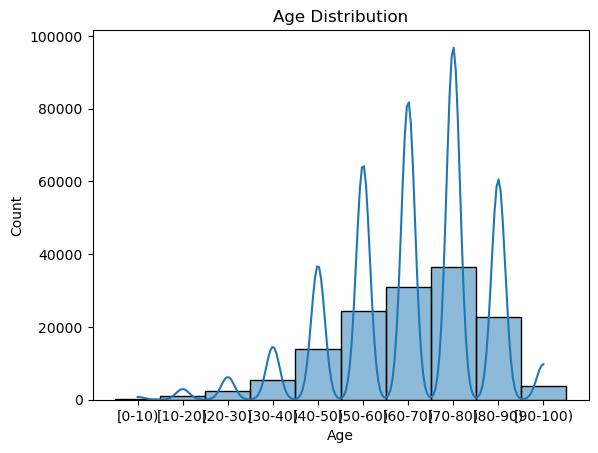

In [66]:
# Age Distribution
sns.histplot(final_df['age_group'], bins=10, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

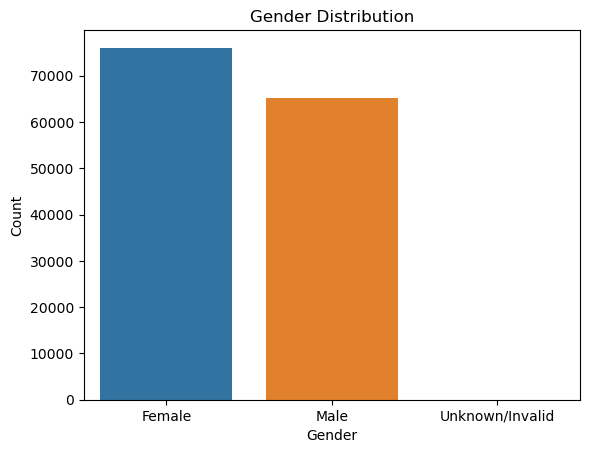

In [68]:
# Gender Distribution
gender_counts = final_df['gender'].value_counts()
sns.barplot(x=gender_counts.index, y=gender_counts.values)
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

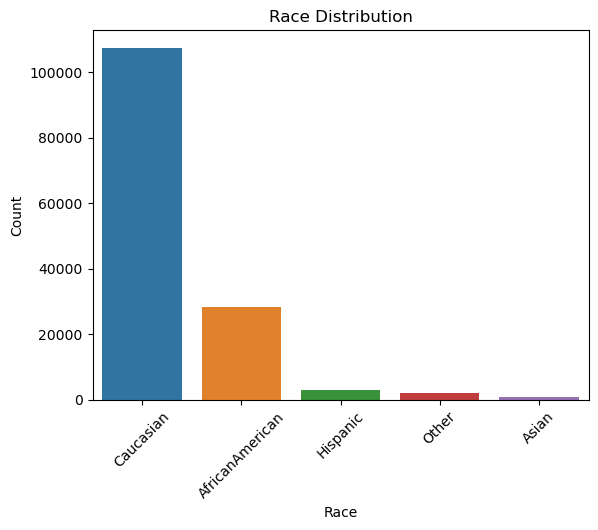

In [70]:
# Race Distribution
race_counts = final_df['race'].value_counts()
sns.barplot(x=race_counts.index, y=race_counts.values)
plt.title('Race Distribution')
plt.xlabel('Race')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

### 3. Analyze Clinical Features
- a. ICU Stay Length -the distribution of ICU stay lengths.
- b. Number of Diagnoses -Understand how many diagnoses patients typically have.
- c. Key Lab Results -Examine critical lab results like blood glucose.

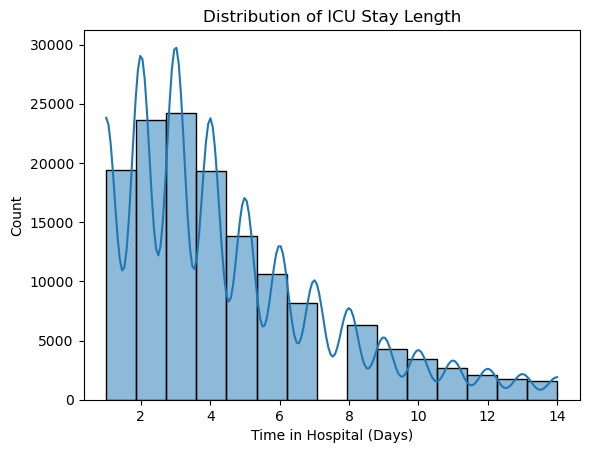

In [72]:
# ICU Stay Length Distribution
sns.histplot(final_df['days_in_hospital'], bins=15, kde=True)
plt.title('Distribution of ICU Stay Length')
plt.xlabel('Time in Hospital (Days)')
plt.ylabel('Count')
plt.show()

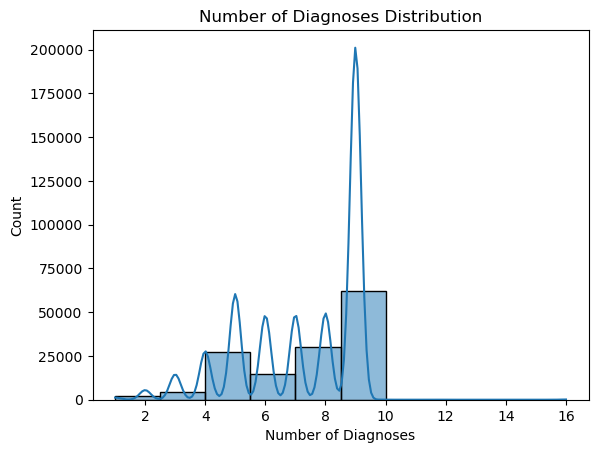

In [74]:
# Number of Diagnoses Distribution
sns.histplot(final_df['number_diagnoses'], bins=10, kde=True)
plt.title('Number of Diagnoses Distribution')
plt.xlabel('Number of Diagnoses')
plt.ylabel('Count')
plt.show()

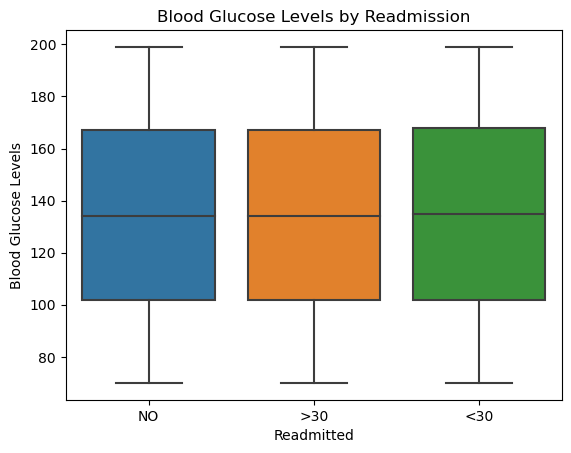

In [76]:
# Blood Glucose Levels
sns.boxplot(data=final_df, x='readmitted', y='Blood_Glucose')
plt.title('Blood Glucose Levels by Readmission')
plt.xlabel('Readmitted')
plt.ylabel('Blood Glucose Levels')
plt.show()

#### 4. Analyze Relationships with Outcomes
- a. Readmission vs. Demographics
- Investigate whether age, gender, or race correlates with readmission.

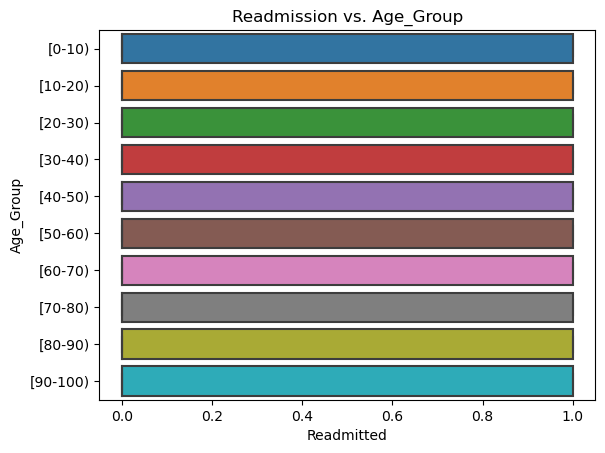

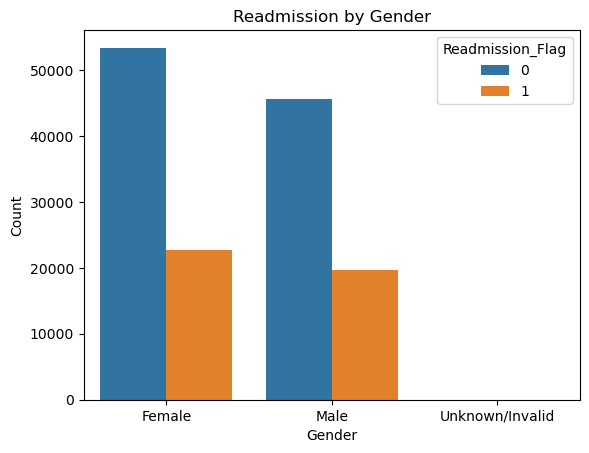

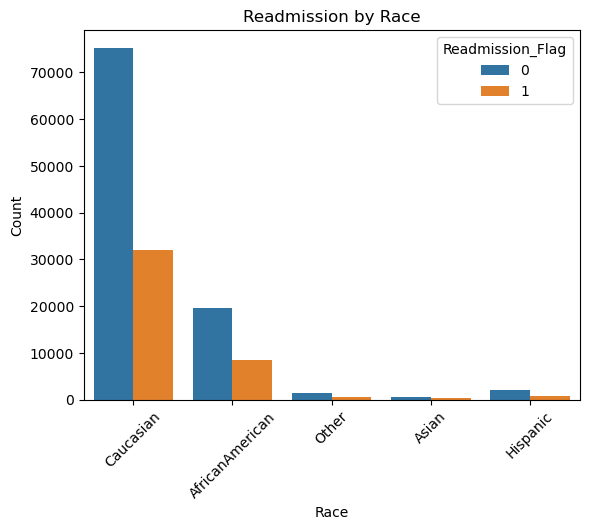

In [78]:
# Readmission by Age Group
sns.boxplot(data=final_df, x='Readmission_Flag', y='age_group')
plt.title('Readmission vs. Age_Group')
plt.xlabel('Readmitted')
plt.ylabel('Age_Group')
plt.show()

# Readmission by Gender
sns.countplot(data=final_df, x='gender', hue='Readmission_Flag')
plt.title('Readmission by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

# Readmission by Race
sns.countplot(data=final_df, x='race', hue='Readmission_Flag')
plt.title('Readmission by Race')
plt.xlabel('Race')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

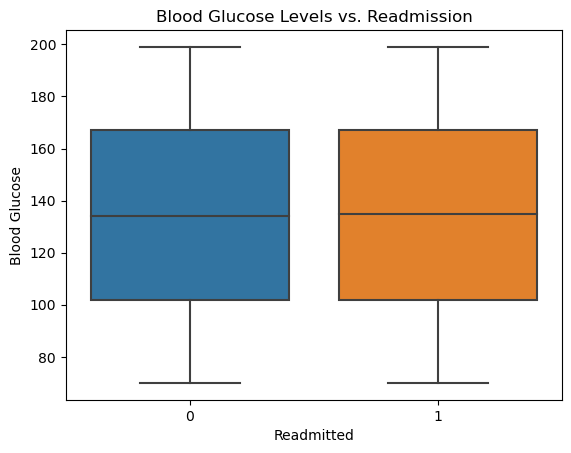

In [80]:
# Blood Glucose Levels
sns.boxplot(data=final_df, x='Readmission_Flag', y='Blood_Glucose')
plt.title('Blood Glucose Levels vs. Readmission')
plt.xlabel('Readmitted')
plt.ylabel('Blood Glucose')
plt.show()

#### Step 4: Statistical Testing
- a. T-test for Continuous Variables
Test whether features like ICU_Length_of_Stay and Blood_Glucose are significantly different between readmitted and non-readmitted groups.

In [ ]:
from scipy.stats import ttest_ind

# T-test for ICU stay length
icu_stay_readmitted = final_df[final_df['Readmission_Flag'] == 1]['ICU_Length_of_Stay']
icu_stay_not_readmitted = final_df[final_df['Readmission_Flag'] == 0]['ICU_Length_of_Stay']

In [93]:
t_stat, p_val = ttest_ind(icu_stay_readmitted, icu_stay_not_readmitted)
print(f"T-test for ICU stay length: t-stat = {t_stat:.2f}, p-val = {p_val:.2e}")

T-test for ICU stay length: t-stat = 1.46, p-val = 1.44e-01


### The p-value = 0.144, which is greater than 0.05.
- This means the difference in ICU stay length between readmitted and non-readmitted patients is not statistically significant at the 5% level.

In [95]:
# T-test for blood glucose
glucose_readmitted = final_df[final_df['Readmission_Flag'] == 1]['Blood_Glucose']
glucose_not_readmitted = final_df[final_df['Readmission_Flag'] == 0]['Blood_Glucose']

In [97]:
t_stat, p_val = ttest_ind(glucose_readmitted, glucose_not_readmitted)
print(f"T-test for Blood Glucose: t-stat = {t_stat:.2f}, p-val = {p_val:.2e}")

T-test for Blood Glucose: t-stat = 0.73, p-val = 4.66e-01


-  The t-statistic measures the magnitude of the difference in mean Blood Glucose levels between the two groups, relative to the variability within the groups.
- Since the p-value 0.466 > 0.05, the difference in Blood Glucose levels between readmitted and non-readmitted patients is not statistically significant.

In [114]:
# Summary statistics for numerical variables
numerical_columns = [
    'days_in_hospital', 'num_lab_procedures', 'num_procedures', 'num_medications',
    'number_outpatient', 'number_emergency', 'number_inpatient','number_diagnoses',
    'Blood_Glucose', 'Creatinine', 'Hemoglobin', 'WBC', 'Heart_Rate',
    'Blood_Pressure_Systolic', 'Blood_Pressure_Diastolic', 'SpO2', 'Respiratory_Rate',
    'Temperature', 'Number_of_Medications', 'Number_of_Medications', 'days_in_hospital'
]

summary_stats = final_df[numerical_columns].describe()
summary_stats

,days_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,Blood_Glucose,Creatinine,...,WBC,Heart_Rate,Blood_Pressure_Systolic,Blood_Pressure_Diastolic,SpO2,Respiratory_Rate,Temperature,Number_of_Medications,Number_of_Medications,days_in_hospital
count,141325.000000,141325.000000,141325.000000,141325.000000,141325.000000,141325.000000,141325.000000,141325.000000,141325.000000,141325.000000,...,141325.000000,141325.000000,141325.000000,141325.000000,141325.000000,141325.000000,141325.000000,141325.000000,141325.000000,141325.000000
mean,4.453281,43.432125,1.351198,15.847508,0.327309,0.182261,0.641571,7.240658,134.324012,1.997993,...,8.001504,89.468113,134.681309,89.363481,91.972036,17.517269,38.001099,3.006319,3.006319,4.453281
std,3.020369,19.338792,1.702229,8.134384,1.174859,0.890225,1.275119,1.983705,37.549941,0.864881,...,2.298280,17.317112,25.985084,17.361826,4.316577,3.448827,1.154071,1.413231,1.413231,3.020369
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,70.000000,0.500059,...,4.000026,60.000000,90.000000,60.000000,85.000000,12.000000,36.000019,1.000000,1.000000,1.000000
25%,2.000000,32.000000,0.000000,10.000000,0.000000,0.000000,0.000000,6.000000,102.000000,1.246704,...,6.027373,74.000000,112.000000,74.000000,88.000000,15.000000,37.000918,2.000000,2.000000,2.000000
50%,4.000000,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000,8.000000,134.000000,1.999556,...,8.001853,89.000000,135.000000,89.000000,92.000000,18.000000,37.999751,3.000000,3.000000,4.000000
75%,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,1.000000,9.000000,167.000000,2.748871,...,9.983684,104.000000,157.000000,104.000000,96.000000,21.000000,39.002184,4.000000,4.000000,6.000000
max,14.000000,132.000000,6.000000,81.000000,42.000000,76.000000,21.000000,16.000000,199.000000,3.499976,...,11.999629,119.000000,179.000000,119.000000,99.000000,23.000000,39.999965,5.000000,5.000000,14.000000


In [120]:
# Frequency counts for categorical variables
categorical_columns = ['gender', 'race', 'age_group', 'admission_type', 'discharge_disposition', 'readmitted']

for col in categorical_columns:
    print(f"\nFrequency counts for {col}:")
    print(final_df[col].value_counts())


Frequency counts for gender:
gender
Female             76053
Male               65268
Unknown/Invalid        4
Name: count, dtype: int64

Frequency counts for race:
race
Caucasian          107418
AfricanAmerican     28183
Hispanic             2901
Other                1976
Asian                 847
Name: count, dtype: int64

Frequency counts for age_group:
age_group
[70-80)     36472
[60-70)     30901
[50-60)     24359
[80-90)     22798
[40-50)     13897
[30-40)      5478
[90-100)     3681
[20-30)      2345
[10-20)      1101
[0-10)        293
Name: count, dtype: int64

Frequency counts for admission_type:
admission_type
Emergency        73206
Urgent           25986
Elective         24885
NULL              9054
Not Available     7744
Not Mapped         414
Trauma Center       21
Newborn             15
Name: count, dtype: int64

Frequency counts for discharge_disposition:
discharge_disposition
Discharged to home                                                                            

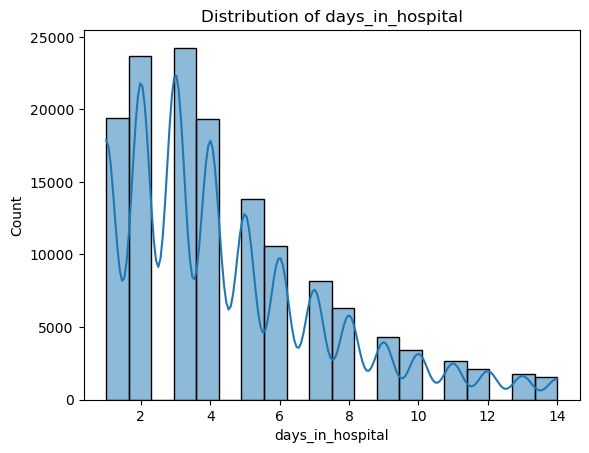

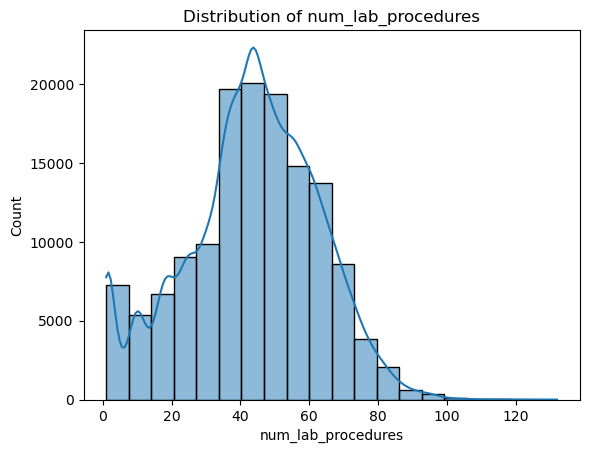

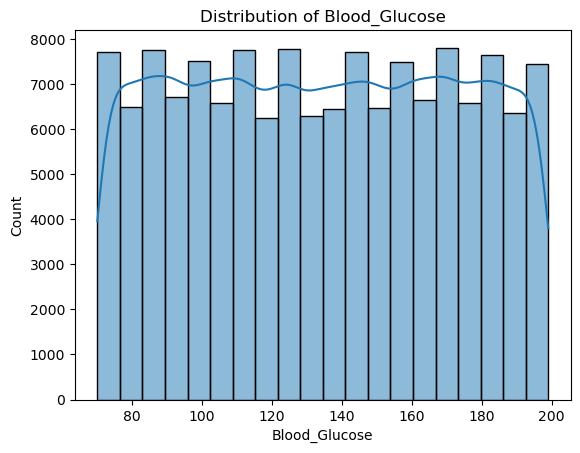

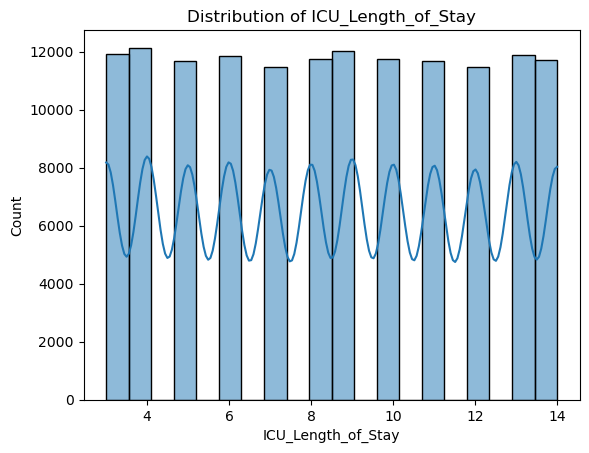

In [124]:
# Plot distribution of key numerical variables
for col in ['days_in_hospital', 'num_lab_procedures', 'Blood_Glucose', 'ICU_Length_of_Stay']:
    sns.histplot(final_df[col], kde=True, bins=20)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()

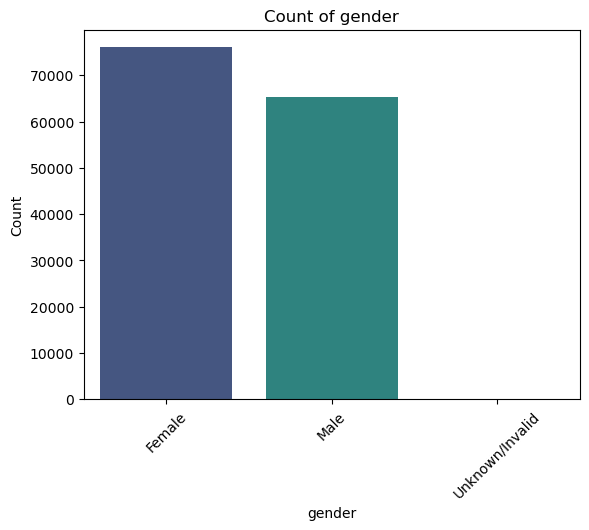

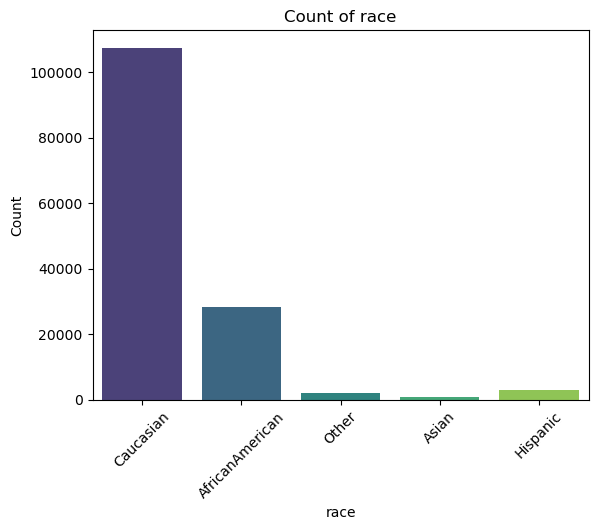

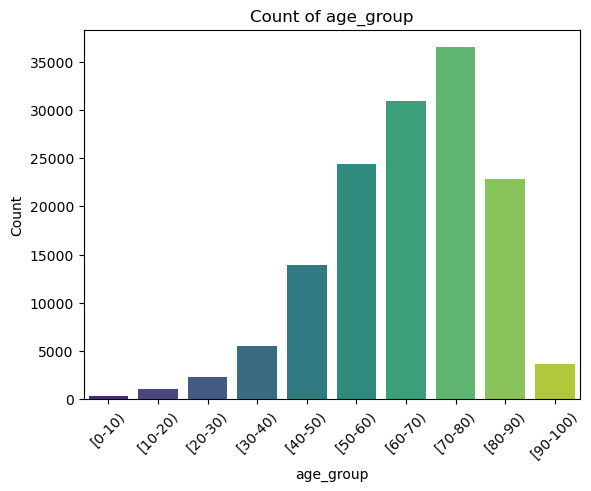

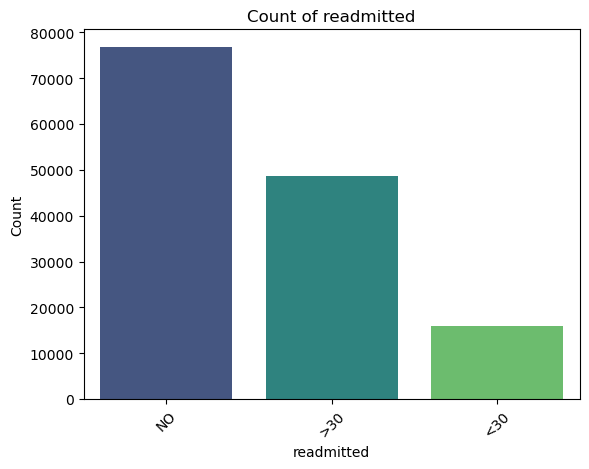

In [126]:
# Plot bar charts for key categorical variables
for col in ['gender', 'race', 'age_group', 'readmitted']:
    sns.countplot(data=final_df, x=col, palette='viridis')
    plt.title(f"Count of {col}")
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()

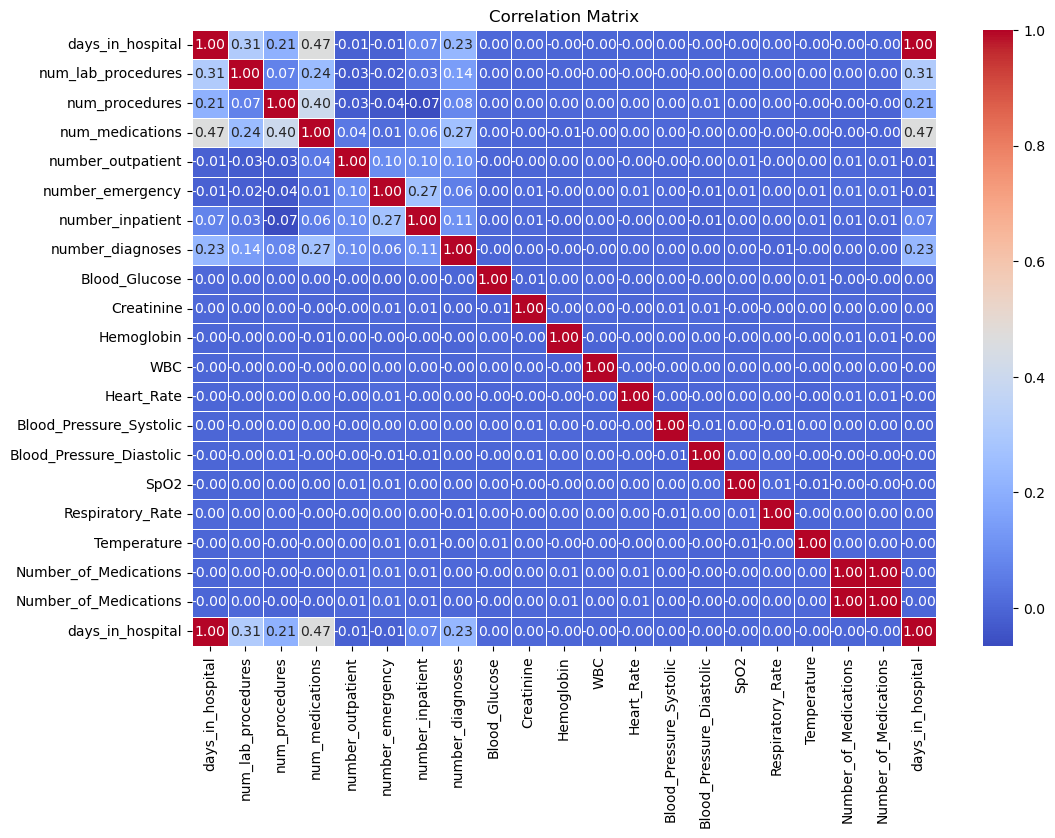

In [128]:
# Correlation matrix
correlation_matrix = final_df[numerical_columns].corr()

# Heatmap for correlations
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


#### Data Visualization: 
• Create visualizations such as histograms, box plots, and scatter plots to 
represent the distribution of key variables (e.g., ICU length of stay, number of 
lab procedures, readmission rate). 

#### Visualize Distributions Using Histograms

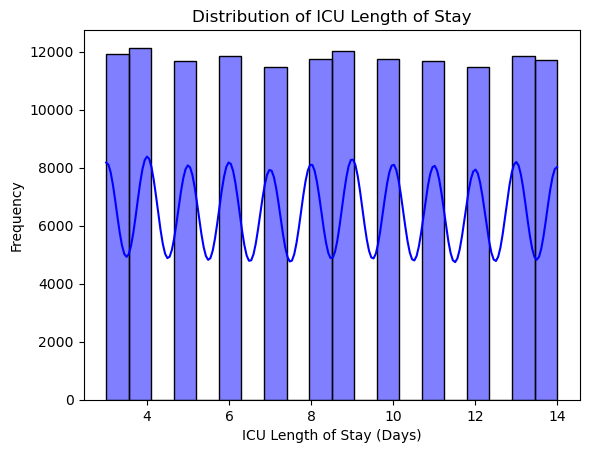

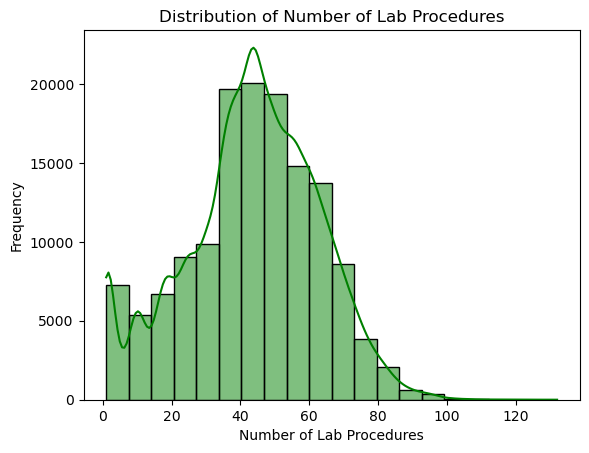

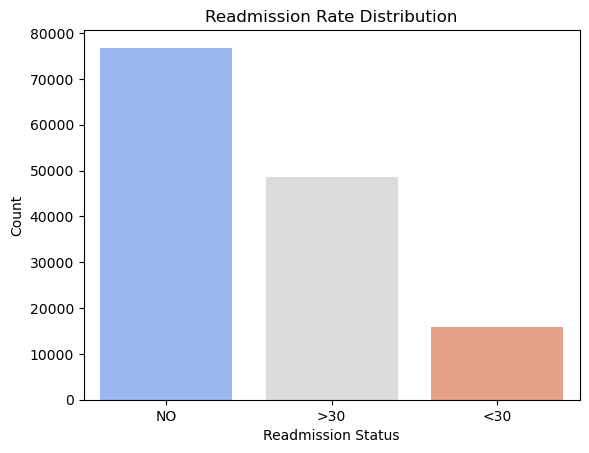

In [134]:
# ICU Length of Stay (Days)
sns.histplot(final_df['ICU_Length_of_Stay'], bins=20, kde=True, color='blue')
plt.title('Distribution of ICU Length of Stay')
plt.xlabel('ICU Length of Stay (Days)')
plt.ylabel('Frequency')
plt.show()

# Number of Lab Procedures
sns.histplot(final_df['num_lab_procedures'], bins=20, kde=True, color='green')
plt.title('Distribution of Number of Lab Procedures')
plt.xlabel('Number of Lab Procedures')
plt.ylabel('Frequency')
plt.show()

#  Readmission Rate
sns.countplot(data=final_df, x='readmitted', palette='coolwarm')
plt.title('Readmission Rate Distribution')
plt.xlabel('Readmission Status')
plt.ylabel('Count')
plt.show()


### Identify Outliers Using Box Plots

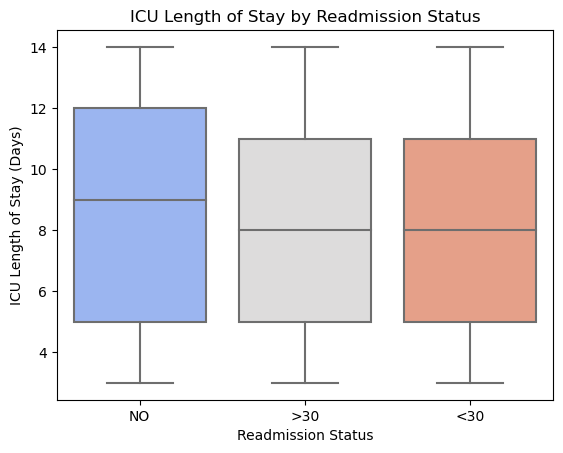

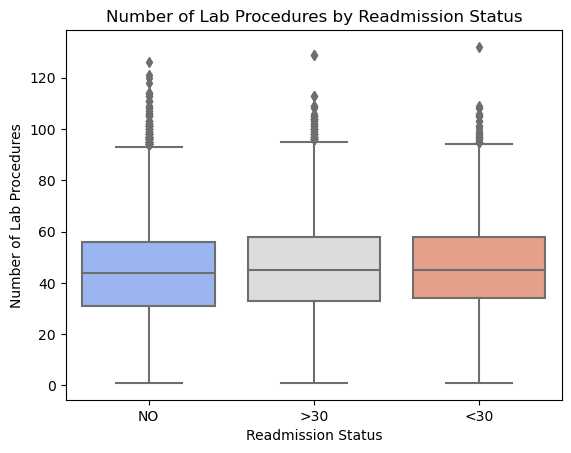

In [139]:
# ICU Length of Stay by Readmission
sns.boxplot(data=final_df, x='readmitted', y='ICU_Length_of_Stay', palette='coolwarm')
plt.title('ICU Length of Stay by Readmission Status')
plt.xlabel('Readmission Status')
plt.ylabel('ICU Length of Stay (Days)')
plt.show()

#  Number of Lab Procedures by Readmission
sns.boxplot(data=final_df, x='readmitted', y='num_lab_procedures', palette='coolwarm')
plt.title('Number of Lab Procedures by Readmission Status')
plt.xlabel('Readmission Status')
plt.ylabel('Number of Lab Procedures')
plt.show()

#### Explore Relationships Using Scatter Plots

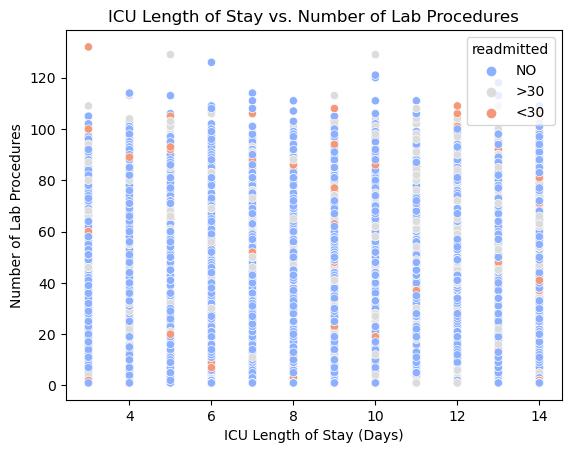

In [145]:
#  ICU Length of Stay vs. Number of Lab Procedures
sns.scatterplot(data=final_df, x='ICU_Length_of_Stay', y='num_lab_procedures', hue='readmitted', palette='coolwarm')
plt.title('ICU Length of Stay vs. Number of Lab Procedures')
plt.xlabel('ICU Length of Stay (Days)')
plt.ylabel('Number of Lab Procedures')
plt.show()

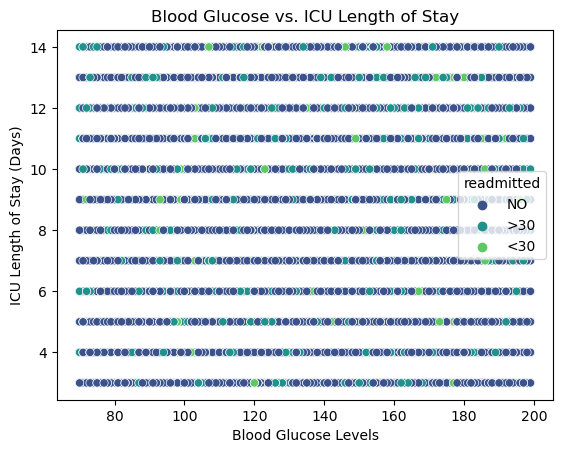

In [149]:
# Blood Glucose vs. ICU Length of Stay
sns.scatterplot(data=final_df, x='Blood_Glucose', y='ICU_Length_of_Stay', hue='readmitted', palette='viridis')
plt.title('Blood Glucose vs. ICU Length of Stay')
plt.xlabel('Blood Glucose Levels')
plt.ylabel('ICU Length of Stay (Days)')
plt.show()

#### Combine Readmission with Demographics

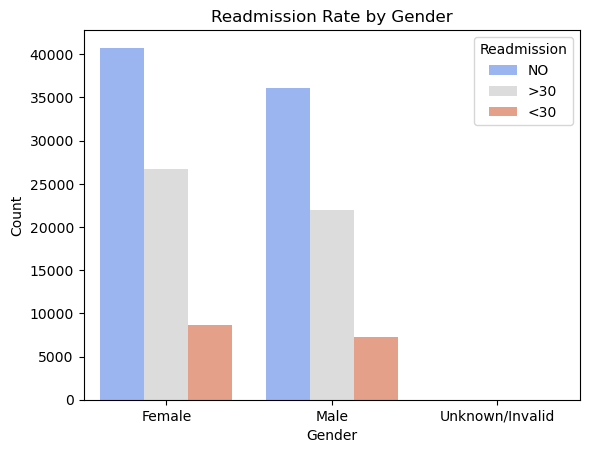

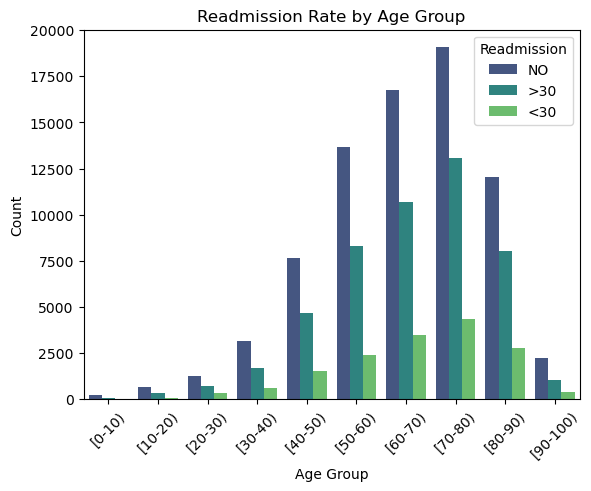

In [153]:
# Readmission Rate by Gender
sns.countplot(data=final_df, x='gender', hue='readmitted', palette='coolwarm')
plt.title('Readmission Rate by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Readmission', loc='upper right')
plt.show()

# Readmission Rate by Age Group
sns.countplot(data=final_df, x='age_group', hue='readmitted', palette='viridis')
plt.title('Readmission Rate by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Readmission', loc='upper right')
plt.show()
